# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2021-12-17 14:52:32
Persistent Unique Scan ID: 'dd87be25-277c-4eeb-8fca-70bc17250a7e'


New stream: 'primary'
+-----------+------------+-------------------------+------------+
|   seq_num |       time | aperture_horizontalSize |    w9_mean |
+-----------+------------+-------------------------+------------+
|         1 | 14:53:00.5 |                   0.000 |      0.000 |


|         2 | 14:53:22.9 |                   0.500 | 2510544190625.287 |


|         3 | 14:53:45.3 |                   1.000 | 41560782559219.422 |


|         4 | 14:54:07.8 |                   1.500 | 136793792948293.203 |


|         5 | 14:54:30.2 |                   2.000 | 346875726031568.125 |
+-----------+------------+-------------------------+------------+
generator scan ['dd87be25'] (scan num: 1)





                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2021-12-17 14:53:00.508376837                      0.0   
2       2021-12-17 14:53:22.942180395                      0.5   
3       2021-12-17 14:53:45.393951893                      1.0   
4       2021-12-17 14:54:07.831648827                      1.5   
5       2021-12-17 14:54:30.294969320                      2.0   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                    

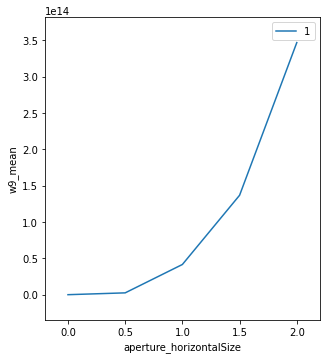

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 5))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (5, 42, 960)


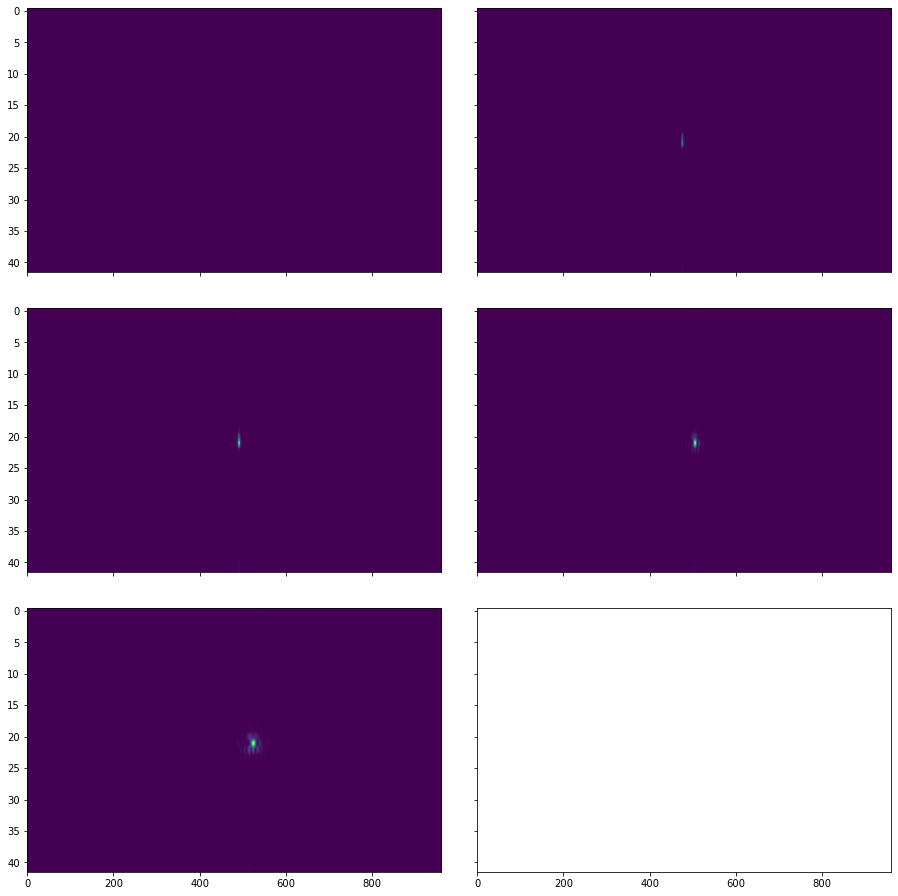

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9



Transient Scan ID: 1     Time: 2021-12-17 14:54:32
Persistent Unique Scan ID: '6b1ac8b2-9474-4e3e-adca-da404e681913'


New stream: 'primary'
+-----------+------------+--------------+
|   seq_num |       time | toroid_r_maj |
+-----------+------------+--------------+
|         1 | 14:54:37.1 |    10000.000 |


|         2 | 14:54:41.3 |    12000.000 |


|         3 | 14:54:45.4 |    14000.000 |


|         4 | 14:54:49.5 |    16000.000 |


|         5 | 14:54:53.7 |    18000.000 |


|         6 | 14:54:57.8 |    20000.000 |


|         7 | 14:55:02.0 |    22000.000 |


|         8 | 14:55:06.1 |    24000.000 |


|         9 | 14:55:10.2 |    26000.000 |


|        10 | 14:55:14.4 |    28000.000 |


|        11 | 14:55:18.5 |    30000.000 |


|        12 | 14:55:22.6 |    32000.000 |


|        13 | 14:55:26.8 |    34000.000 |


|        14 | 14:55:30.9 |    36000.000 |


|        15 | 14:55:35.0 |    38000.000 |


|        16 | 14:55:39.2 |    40000.000 |


|        17 | 14:55:43.3 |    42000.000 |


|        18 | 14:55:47.5 |    44000.000 |


|        19 | 14:55:51.6 |    46000.000 |


|        20 | 14:55:55.7 |    48000.000 |


|        21 | 14:55:59.9 |    50000.000 |
+-----------+------------+--------------+
generator scan ['6b1ac8b2'] (scan num: 1)





                                 time  toroid_r_maj  \
seq_num                                               
1       2021-12-17 14:54:37.182738543       10000.0   
2       2021-12-17 14:54:41.322021484       12000.0   
3       2021-12-17 14:54:45.456525326       14000.0   
4       2021-12-17 14:54:49.597764015       16000.0   
5       2021-12-17 14:54:53.738415241       18000.0   
6       2021-12-17 14:54:57.864986897       20000.0   
7       2021-12-17 14:55:02.000086546       22000.0   
8       2021-12-17 14:55:06.146457434       24000.0   
9       2021-12-17 14:55:10.277146578       26000.0   
10      2021-12-17 14:55:14.413065672       28000.0   
11      2021-12-17 14:55:18.558345795       30000.0   
12      2021-12-17 14:55:22.687865019       32000.0   
13      2021-12-17 14:55:26.817098379       34000.0   
14      2021-12-17 14:55:30.952123880       36000.0   
15      2021-12-17 14:55:35.094234705       38000.0   
16      2021-12-17 14:55:39.271528721       40000.0   
17      20

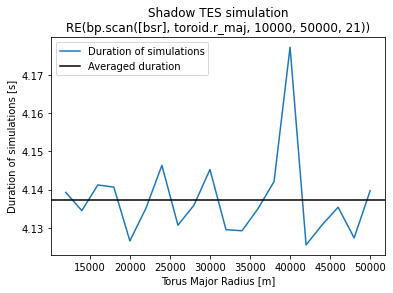

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()